# Brain Tumor Detection

This Project is done with the aim of detecting wether its tumor or not its famous Kaggle Problem the link to the dataset is :- https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection

## Importing the Required Libaries

In [1]:
import os
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### Fearure Engineering

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

### Basic OS Function

In [12]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:/Users/PC/Desktop/16 Data Science Project/Brain Tumor Detection/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [13]:
# This cell updates result list for images without tumor
paths = []
for r, d, f in os.walk(r"C:/Users/PC/Desktop/16 Data Science Project/Brain Tumor Detection/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [14]:
data = np.array(data)
print(data.shape)

(139, 128, 128, 3)


In [15]:
result = np.array(result)
result = result.reshape(139,2)

### Dividing the Dataset Into Traning and Testing 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

### Building the CNN 

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32,kernel_size = (2,2),activation = 'relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size = (2,2),activation = 'relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [23]:
y_train.shape

(111, 2)

### Traning on data

In [26]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 26.9135 - val_loss: 101.5255
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 24.3311 - val_loss: 34.6188
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 8.3105 - val_loss: 14.3321
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 3.8179 - val_loss: 23.6135
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 1.5098 - val_loss: 26.0155
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 0.4527 - val_loss: 18.2962
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 0.3642 - val_loss: 12.7626
Epoch 8/30
3/3 [==============================] - 6s 2s/step - loss: 0.6840 - val_loss: 9.9859
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 0.3787 - val_loss: 9.7656
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 0.1187 - val_loss: 9.0281
Epoch 11/30
3/3 [======================

## Accuracy

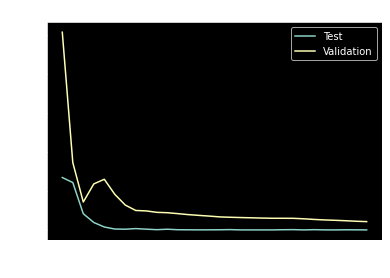

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [28]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

## Just Checking the Model

100.0% Confidence This Is No, Its not a tumor


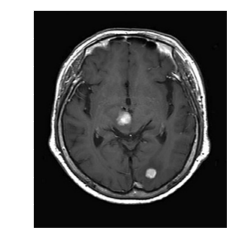

In [29]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/PC/Desktop/16 Data Science Project/Brain Tumor Detection/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99983310699463% Confidence This Is A Its a Tumor


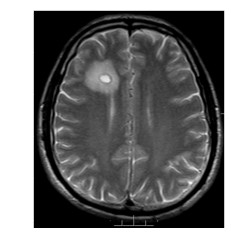

In [30]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:/Users/PC/Desktop/16 Data Science Project/Brain Tumor Detection/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))